### Paso 1. Descripcion de los datos

In [38]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/games.csv')


### Paso 2. Preprocesamiento de los datos

#### Nombres de columnas a minusculas 

In [3]:
#Columnas antes del cambio
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [4]:
#Cambiando las columnas a minusculas
names_low = []
for name in df.columns:
    name_lowered = name.lower()
    names_low.append(name_lowered)
df.columns = names_low
print (df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Conversión de los datos

In [5]:
# Convierte los datos en los tipos necesarios.

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


De acuerdo al info del df original, year_of_release (son años) y critic_score (nros del 1 al 100) son float64, pero es mejor tratarlos de acuerdo a ambos como enteros. 


####  Valores ausentes

In [6]:
# Rellenando con 0 los NaN para evitar errores.
df['year_of_release'] = df['year_of_release'] .fillna(0)
df['critic_score'] = df['critic_score'] .fillna(0)


# Cambio de float64 a int
df = df.astype({
    'year_of_release': 'int',
    'critic_score': 'int',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
#revisando si hay datos con valores NaN en name 
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,NaN,NaN


In [8]:
# Eliminando las filas con desconocido name y genre
df = df.dropna(subset=['name'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [9]:
# Para transformar user_score de object a float64

#1ero se pueden convertir los tbd a NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [10]:
# Valores nulos en rating

df['rating'] = df['rating'].fillna('desconocido')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [11]:
# Ventas totales por juego

sales_per_game = df.groupby('name')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

In [12]:
df ['global_sales'] = (
    df['na_sales'] +
    df['eu_sales'] +
    df['jp_sales'] +
    df['other_sales']
)

In [13]:
df = df.sort_values(by='global_sales', ascending=False)

print(df [['name','global_sales']])

                                                   name  global_sales
0                                            Wii Sports         82.54
1                                     Super Mario Bros.         40.24
2                                        Mario Kart Wii         35.52
3                                     Wii Sports Resort         32.77
4                              Pokemon Red/Pokemon Blue         31.38
...                                                 ...           ...
16181                         Sakura Sakura: Haru Urara          0.01
16182                 Rocksmith 2014 Edition Remastered          0.01
16714                               Winning Post 8 2016          0.01
16676                                  G1 Jockey 4 2008          0.00
16709  SCORE International Baja 1000: The Official Game          0.00

[16713 rows x 2 columns]


### Paso 3. Analiza los datos

#### Cantidad de juegos por año 

<AxesSubplot:>

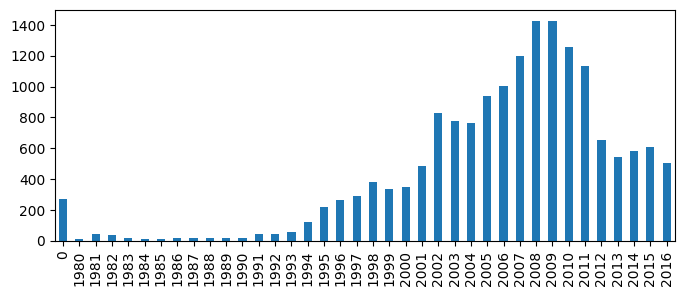

In [14]:
df['year_of_release'].value_counts().sort_index().plot(kind= 'bar', figsize=(8,3))

Los datos de cada periodo no son significativos. Desconsiderando los años sin definir, de acuerdo a la grafica, la cantidad de juegos antes de 1991 es escasa, y a partir de ese año, se ve que hubo un crecimiento significativo en la industria. 

#### Plataformas populares

In [15]:
df.groupby('platform')['global_sales'].sum().sort_values(ascending= False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: global_sales, dtype: float64

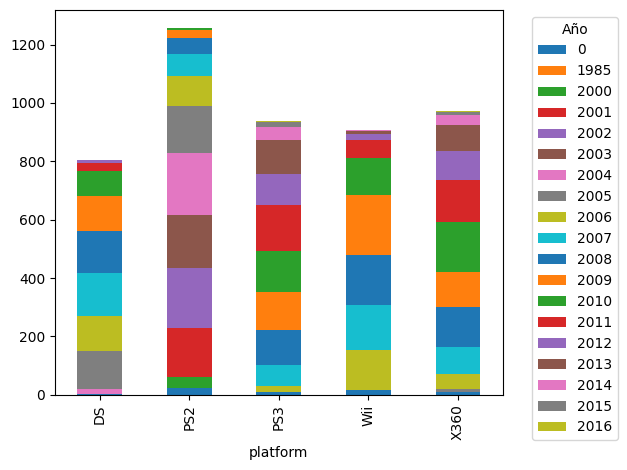

In [16]:
top_platforms = df['platform'].value_counts().head(5).index
df_top = df[df['platform'].isin(top_platforms)]

df_top.groupby(['platform','year_of_release'])['global_sales'].sum().unstack().plot(kind='bar', stacked=True)
plt.legend(title='Año', bbox_to_anchor= (1.05, 1), loc='upper left')
plt.tight_layout()

Las plataformas con mayor ventas totales fueron PS2, Xbox360 y PS3. Despues le siguen Wii y DS respectivamente.
Las plataformas mas antiguas de este top, son PS2, DS y Wii, entre 2005 y 2010, dejando de generar ingresos en 2012. En cambio, PS3 y Xbox 360, mantuvieron ventas hasta 2016. Las nuevas plataformas tardan entre 2 y 3 años en alcanzar su pico, mientras que las antiguas tardan en desaparecer completamente, tras 10 años de venta.

##### Para las plataformas que solian ser populares pero que ahora (2016) no tienen ventas.


In [17]:
#a. Ventas solo en 2016
sales_2016 = df[df['year_of_release'] == 2016].groupby('platform')['global_sales'].sum()

#b. Plataformas sin ventas en 2016
platforms = set(df['platform'].unique())
active_2016 = set(sales_2016[sales_2016>0].index)
inactive = platforms - active_2016
print("Sin ventas en 2016")
print(inactive)

Sin ventas en 2016
{'GBA', 'PCFX', 'GC', 'XB', 'NES', 'TG16', 'SNES', 'DC', 'PSP', 'PS2', 'GB', 'SCD', '3DO', 'SAT', 'WS', 'DS', 'GEN', 'PS', '2600', 'NG', 'GG', 'N64'}


De esta lista de plataformas sin ventas, de las mas populares destacan PS2, DS y N64. Donde PS2 obtuvo ventas destacadas entre 2001 y 2007, pero desaparecio despues de 2011. Wii tambien fue popular, entre 2007 y 2010, pero dejo de tener actividad comercial despues de 2013.

#### Construir un modelo predictivo del 2017.

In [18]:
#Tomando valores de 2012 a 2016
df['year_of_release'].value_counts().sort_index().tail(10)

2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

In [19]:
df_model = df[df['year_of_release'] >= 2012] 
print (df_model.sample(5))

                                      name platform  year_of_release  \
13270                       Child of Light      PS4             2014   
6463             Call of Duty: Black Ops 3       PC             2015   
978    The Legend of Zelda: The Wind Waker     WiiU             2013   
11212          Dynasty Warriors 8: Empires      PS3             2014   
3416     Metal Gear Solid V: Ground Zeroes      PS3             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
13270  Role-Playing      0.00      0.01      0.04         0.00            82   
6463        Shooter      0.00      0.25      0.00         0.01             0   
978          Action      0.92      0.60      0.14         0.14             0   
11212        Action      0.00      0.00      0.09         0.00             0   
3416         Action      0.14      0.12      0.27         0.05            66   

       user_score       rating  global_sales  
13270         8.0         E10+         

Los datos que considerare relevantes son los pertenecientes a los años entre 2012 y 2016 para enfocarme mas a los años mas cercanos a 2017.

#### Plataformas lideres en ventas para este periodo.

In [20]:
df_model.groupby('platform')['global_sales'].sum().sort_values(ascending= False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: global_sales, dtype: float64

Como se ve de acuerdo al top de ventas, los lideres son PS4, PS3 y Xbox 360

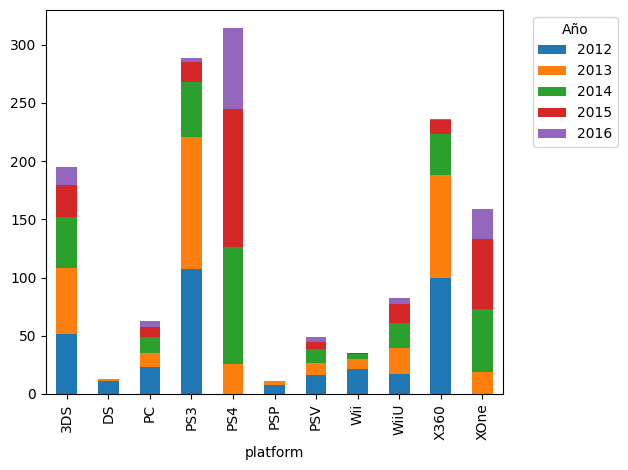

In [21]:
df_model.groupby(['platform','year_of_release'])['global_sales'].sum().unstack().plot(kind='bar', stacked=True)
plt.legend(title='Año', bbox_to_anchor= (1.05, 1), loc='upper left')
plt.tight_layout()

De acuerdo al grafico de barras, de las plataformas con ventas de 2016: las plataformas que crecen en ventas son PS3 y PS4. En cambio, reducen o caen en ventas, significativamente DS, PSP y Wii.

PS4, XOne, y 3DS, son plataformas potencialmente rentables ya que siguen activas y presentan ventas relevantes hacia 2016. Por otro lado, el PS3 y el xbox 360, aunque tuvieron buenas ventas, se reducen las mismas significativamente para 2016


#### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

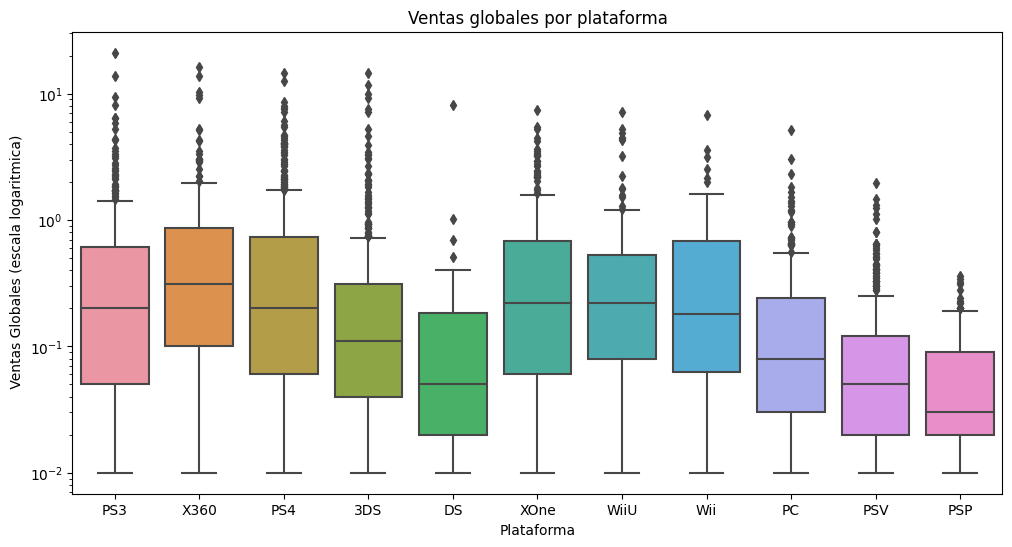

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_model,
    x = 'platform',
    y = 'global_sales'
).set(title = 'Ventas globales por plataforma',
      xlabel='Plataforma',
      ylabel=' Ventas Globales (escala logaritmica)'
     )

plt.yscale('log')

##### ¿Son significativas las diferencias en las ventas? 
De acuerdo al diagrama de caja, hay diferencias significativas entre las ventas por plataforma. El rango intercuatilico varia bastante, sugiriendo que la dist. de ventas entre plataformas no es igual.
Visualmente la plat. con mediana mas alta es xbox 360, siguiendo las medianas de XONe y wiiU. Visualmente la plat. con mediana mas baja es la de PSP


##### ¿Qué sucede con las ventas promedio en varias plataformas?
Viendo la cantidad puntos o valores atipicos: 
- Muchos val. atipicos, indica que hay juegos con ventas muy altas, elevando el promedio de la plataforma, pero sin reflejar rentabilidad.
- Pocos val. atipicos y ademas medianas bajas, como el PSP, sugieren promedio de ventas bajo.


#### Cómo afectan las reseñas de usuarios y profesionales las ventas del PS4

In [23]:
df_model_ps4 = df_model[df_model ['platform'] == 'PS4']
print(df_model_ps4.head())

                              name platform  year_of_release    genre  \
31       Call of Duty: Black Ops 3      PS4             2015  Shooter   
42              Grand Theft Auto V      PS4             2014   Action   
77                         FIFA 16      PS4             2015   Sports   
87    Star Wars Battlefront (2015)      PS4             2015  Shooter   
92  Call of Duty: Advanced Warfare      PS4             2014  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
31      6.03      5.86      0.36         2.38             0         NaN   
42      3.96      6.31      0.38         1.97            97         8.3   
77      1.12      6.12      0.06         1.28            82         4.3   
87      2.99      3.49      0.22         1.28             0         NaN   
92      2.81      3.48      0.14         1.23            83         5.7   

         rating  global_sales  
31  desconocido         14.63  
42            M         12.62  
77            

<Figure size 700x500 with 0 Axes>

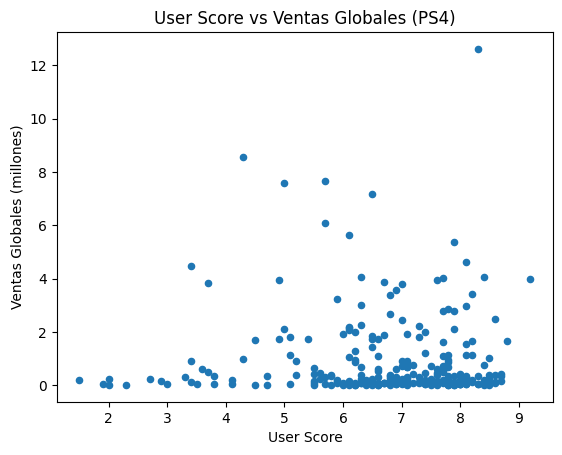

In [24]:
# User Score vs Global Sales
plt.figure(figsize=(7,5))
df_model_ps4.plot(x='user_score', y='global_sales', kind='scatter')

plt.title('User Score vs Ventas Globales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Ventas Globales (millones)')
plt.show()

In [25]:
# Coeficiente de correlación de user_score vs ventas

ps4_corr_user = df_model_ps4['user_score'].corr(df_model_ps4['global_sales'])
print(ps4_corr_user)

-0.031957110204556445


La correlacion ligeramente negativa indica que mientras una variable reduce la otra incrementa. Por lo tanto, hay juegos que tienen bajas ventas pero buenas reseñas de los usuarios y viceversa.

<Figure size 700x500 with 0 Axes>

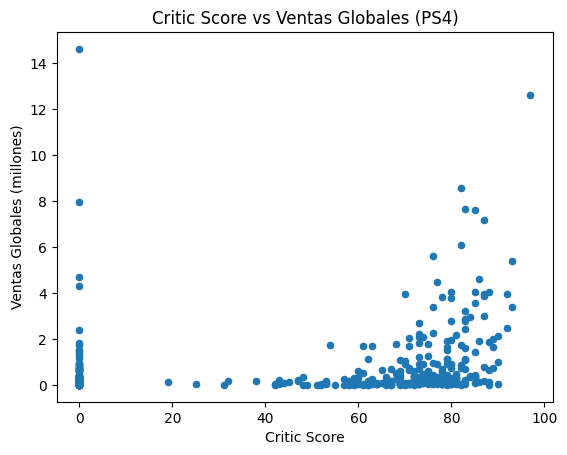

In [26]:
# Critic Score vs Global Sales
plt.figure(figsize=(7,5))
df_model_ps4.plot(x='critic_score', y='global_sales', kind='scatter')

plt.title('Critic Score vs Ventas Globales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.show()

In [27]:
# Coeficiente de correlación de critic_score vs ventas

ps4_corr_critic = df_model_ps4['critic_score'].corr(df_model_ps4['global_sales'])
print(ps4_corr_critic)

0.22754960627752652


La correlacion positiva indica que hay valores que incrementan juntos. Por lo tanto, hay juegos que tienen buenas ventas y a su vez buenas reseñas de los criticos y viceversa.

Por ende, de acuerdo a esta comparacion, Las reseñas de los criticos parecen predecir mejor las ventas que las reseñas de usuarios, al menos en el caso de los títulos lanzados en PS4 entre 2012 y 2016.

In [28]:
ps4_games = df_model_ps4['name'].dropna().unique()
df_multip = df_model[df_model['name'].isin(ps4_games)]


comp_sales = df_multip.groupby(['name', 'platform'])['global_sales'].sum().unstack().fillna(0)
comp_sales = comp_sales[comp_sales.gt(0).sum(axis=1) > 1]
print(comp_sales.head())

print()
print()

reviews = df_multip.groupby(['name', 'platform'])[['user_score', 'critic_score']].mean().unstack()
print(reviews.head())

platform                                     3DS   DS   PC   PS3   PS4  PSP  \
name                                                                          
7 Days to Die                               0.00  0.0  0.0  0.00  0.14  0.0   
Adventure Time: Finn & Jake Investigations  0.09  0.0  0.0  0.08  0.10  0.0   
Aegis of Earth: Protonovus Assault          0.00  0.0  0.0  0.02  0.02  0.0   
Agatha Christie's The ABC Murders           0.00  0.0  0.0  0.00  0.02  0.0   
Akiba's Trip: Undead & Undressed            0.00  0.0  0.0  0.11  0.11  0.0   

platform                                     PSV  Wii  WiiU  X360  XOne  
name                                                                     
7 Days to Die                               0.00  0.0  0.00  0.00  0.05  
Adventure Time: Finn & Jake Investigations  0.00  0.0  0.05  0.09  0.05  
Aegis of Earth: Protonovus Assault          0.03  0.0  0.00  0.00  0.00  
Agatha Christie's The ABC Murders           0.00  0.0  0.00  0.00  0.01  
Ak

Eligiendo de referencia el juego de "7 Days to Die", en PS4 tiene mejor venta que en Xone, siendo este juego a su vez mejor calificado por los criticos para PS4 que para Xone.

#### Distribución general de los juegos por género

Text(0, 0.5, 'Cantidad de juegos')

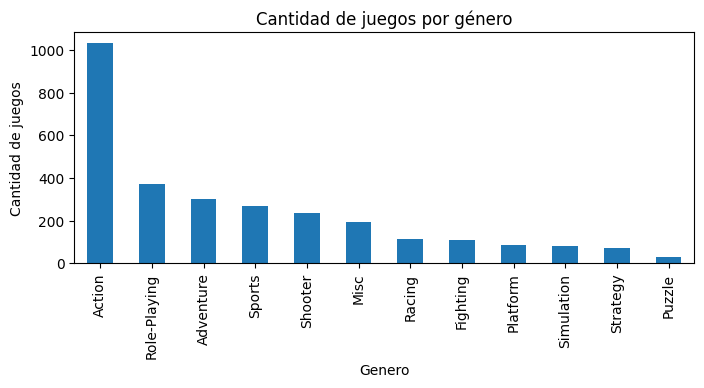

In [29]:
df_model['genre'].value_counts().plot(kind='bar', figsize=(8,3), title='Cantidad de juegos por género')
plt.xlabel('Genero')
plt.ylabel('Cantidad de juegos')

Como muestra la grafica, la mayoria de los juegos son de accion.

#### ¿Qué se puede decir de los géneros más rentables?


Text(0, 0.5, 'Ventas Globales')

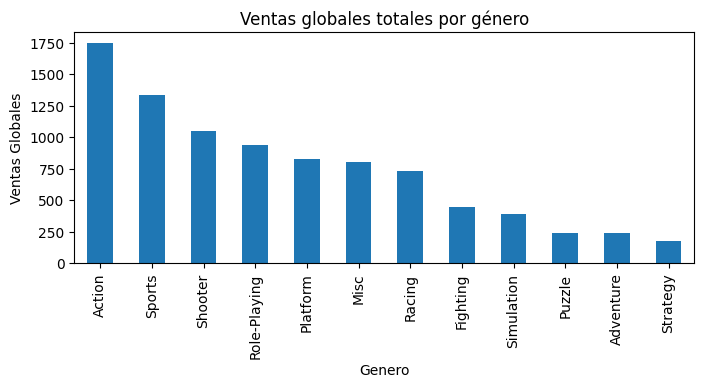

In [30]:
global_sales_genre = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
global_sales_genre.plot(kind='bar', figsize=(8,3), title='Ventas globales totales por género')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')

Las muchas ventas de genero se puede deber a la cantidad de juegos por genero.

Para saber los géneros más rentables, se puede calcular el promedio de ventas por juego:

Text(0, 0.5, 'Ventas promedio por juego')

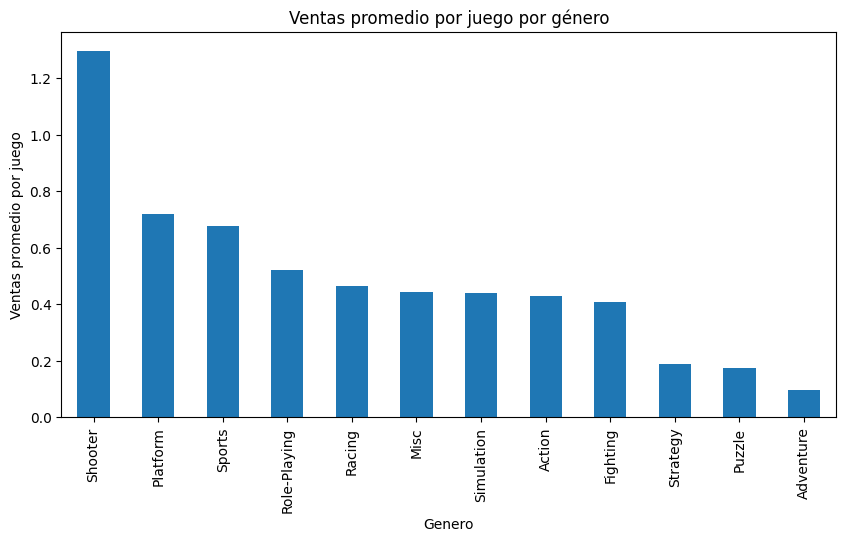

In [31]:
mean_sales = df_model.groupby('genre')['global_sales'].mean().sort_values(ascending=False)
mean_sales.plot(kind='bar', figsize=(10,5), title='Ventas promedio por juego por género')
plt.xlabel('Genero')
plt.ylabel('Ventas promedio por juego')

Como se puede ver de acuerdo al grafico de barras del promedio de ventas de juego por genero, 
los generos mas rentables son Shooter, Platform y Sports.

#### ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
Retomando la idea, de que las muchas ventas de genero se puede deber a la cantidad de juegos por genero. Aunque el genero de Action tiene muchas ventas, no se puede decir que es mas rentable que generos como Shooter. Por lo tanto, con ventas y mas rentables son Shooter y Sports ya que tienen gran cantidad de lanzamientos y tienen buen rendimiento individual. En cambio, géneros como Puzzle, Strategy, y Adventure suelen tener tanto menos lanzamientos como ventas promedio más bajas.


### Paso 4. Crea un perfil de usuario para cada región.

#### Plataformas principales por región.

In [32]:
top_plat_na = df_model.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_plat_eu = df_model.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_plat_jp = df_model.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

top_plat = pd.DataFrame({
    'NA': top_plat_na.index,
    'NA Ventas (mill)': top_plat_na.values,
    '': [''] * 5,  # columna vacia como espacio
    'EU': top_plat_eu.index,
    'EU Ventas (mill)': top_plat_eu.values,
    '  ': [''] * 5, # columna vacia como espacio
    'JP': top_plat_jp.index,
    'JP Ventas (mill)': top_plat_jp.values
})

print(top_plat)
print()
print()

     NA  NA Ventas (mill)      EU  EU Ventas (mill)       JP  JP Ventas (mill)
0  X360            140.05     PS4            141.09      3DS             87.79
1   PS4            108.74     PS3            106.86      PS3             35.29
2   PS3            103.38    X360             74.52      PSV             21.04
3  XOne             93.12    XOne             51.59      PS4             15.96
4   3DS             55.31     3DS             42.64     WiiU             13.01




Las 3 regiones principales coinciden en algunas de las 5 plataformas mas vendidas. 
- Para la region de NA, el Xbox 360 es el que lidera ventas. 
- Para la region de EU, el PS4  es el que tienen mas ventas.
- Para la region de JP, el 3DS lidera las ventas. 

#### Generos principales por región.

In [33]:
top_gen_na = df_model.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_gen_eu = df_model.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_gen_jp = df_model.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

top_gen = pd.DataFrame({
    'NA': top_gen_na.index,
    'NA Ventas (mill)': top_gen_na.values,
    '': [''] * 5,  # columna vacia como espacio
    'EU': top_gen_eu.index,
    'EU Ventas (mill)': top_gen_eu.values,
    '  ': [''] * 5, # columna vacia como espacio
    'JP': top_gen_jp.index,
    'JP Ventas (mill)': top_gen_jp.values
})

print(top_gen)
print()
print()

             NA  NA Ventas (mill)              EU  EU Ventas (mill)     \
0        Action            177.84          Action            159.34      
1       Shooter            144.77         Shooter            113.47      
2        Sports             81.53          Sports             69.09      
3  Role-Playing             64.00    Role-Playing             48.53      
4          Misc             38.19          Racing             27.29      

             JP  JP Ventas (mill)  
0  Role-Playing             65.44  
1        Action             52.80  
2          Misc             12.86  
3    Simulation             10.41  
4      Fighting              9.44  




Los generos con mas ventas en NA y EU, son Action, Shooter y Sports. A diferencia de las otras regiones, los generos de Role-Playing y Misc tienen mas popularidad.

#### Cómo las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [34]:
rating_na = df_model.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
rating_eu = df_model.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
rating_jp = df_model.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

rating = pd.DataFrame({
    'NA': rating_eu.index,
    'NA Ventas (mill)': rating_na.values,
    '': [''] * 5,  # columna vacia como espacio
    'EU': rating_eu.index,
    'EU Ventas (mill)': rating_eu.values,
    '  ': [''] * 5, # columna vacia como espacio
    'JP': rating_jp.index,
    'JP Ventas (mill)': rating_jp.values
})

print(rating)

            NA  NA Ventas (mill)             EU  EU Ventas (mill)     \
0            M            231.57              M            193.96      
1            E            114.37              E            113.03      
2  desconocido            103.31    desconocido             91.50      
3         E10+             75.70           E10+             55.37      
4            T             66.02              T             52.96      

            JP  JP Ventas (mill)  
0  desconocido            108.84  
1            E             28.33  
2            T             26.02  
3            M             21.20  
4         E10+              8.19  


De acuerdo al rating por region, para las regiones NA y EU, los juegos con clasificacion  M (Mature) son los mas vendidos, seguidos por los juegos E (Everyone) y por los que no tienen clasificacion determinada en el df (desconocido).  
En cambio para la region JP, obviando los de rating desconocido, los juegos de clasificacion E (Everyone) tienen mas impacto por encima de los M. Esta diferencia puede deberse a las diferencias regionales, lo cierto es que las clasificaciones de ESRB si afectan a las ventas en regiones individuales.

## PASO 5 
### Pruebas de hipótesis

In [35]:
df_valid = df_model[df_model['user_score'].notna()]
df_valid['user_score'].dtype

dtype('float64')

#### PRUEBA 1: "Las calificaciones promedio de los usuarios para Xbox One y PC son las mismas”

In [43]:
from scipy.stats import levene

xone_score = df_valid[(df_valid['platform'] == 'XOne')&(df_valid['user_score'].notna())]['user_score']
pc_score = df_valid[(df_valid['platform'] == 'PC')&(df_valid['user_score'].notna())]['user_score']

#Prueba de Levene 
stat_levene1, p_levene1 = levene(xone_score, pc_score)
print('Levene Xbox vs PC - valor p:', p_levene1)

equal_var1 = p_levene1 > 0.05

#Hipotesis sobre la igualdad de las medias de dos grupos independientes
test_results1 = st.ttest_ind(xone_score, pc_score, equal_var = equal_var1)

print('T-test Xbox vs PC - valor p: ', test_results1.pvalue)

if test_results1.pvalue < 0.05:
    print ("Rechazamos la hipotesis nula")
else:
    print ("No podemos rechazar la hipotesis nula")

Levene Xbox vs PC - valor p: 0.01251484281850554
T-test Xbox vs PC - valor p:  0.5489537965135027
No podemos rechazar la hipotesis nula


Resultado p1:     Por los resultados obtenidos en la prueba, no hay evidencia suficiente para decir que difieren o que hay una diferencia significativa entre las calificaciones promedio.

#### PRUEBA 2: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."

In [48]:
action_score = df_valid[(df_valid['genre'] == 'Action')&(df_valid['user_score'].notna())]['user_score']
sports_score = df_valid[(df_valid['genre'] == 'Sports')&(df_valid['user_score'].notna())]['user_score']

#Prueba de Levene 
stat_levene2, p_levene2 = levene(action_score, sports_score)
print('Levene Action vs Sports - valor p:', p_levene2)

equal_var2 = p_levene2 > 0.05

#Hipotesis sobre la igualdad de las medias de dos grupos independientes
test_results2 = st.ttest_ind(action_score, sports_score, equal_var = equal_var2)

print('T-test Xbox vs PC - valor p: ', test_results2.pvalue)

if test_results2.pvalue < 0.05:
    print ("Rechazamos la hipotesis nula")
else:
    print ("No podemos rechazar la hipotesis nula")

Levene Action vs Sports - valor p: 1.3125789036876737e-05
T-test Xbox vs PC - valor p:  4.243077765726105e-20
Rechazamos la hipotesis nula


Resultado p2:     De acuerdo a la prueba de hipotesis, hay una diferecncia significativa entre las calificaciones promedio para los generos de accion y deportes.

### Paso 6. Conclusión general

El objetivo principal del proyecto fue el analisis y la comprensión de como se comporta el mercado de videojuegos. Al trabajar con estos datos, se pudieron identificar patrones para determinar si un juego tiene exito en ventas o no, como afectan las calificaciones dependiendo de la fuente, y como son las preferencias regionales. 

Trabajando con los datos relevantes, se pudieron determinar y concluir cuales plataformas son potencialmente rentables. PS4, XOne, y 3DS, son plataformas que cumplen este aspecto, ya que siguen activas y presentan ventas relevantes hacia 2016. Por otro lado, el PS3 y el xbox 360, aunque tuvieron buenas ventas, no tuvieron el mismo impacto positivo en ventas para 2016.

Los generos de videojuegos son otro aspecto importante. El exito de un genero dependiendo de como sea estudiado. La forma mas objetiva es por el promedio de ventas de genero por videojuego, ya que si se estudia el total de ventas por genero, afecta la cantidad de juegos que tiene cada genero, que es diferente entre un genero y otro.

Con ayuda de las pruebas de hipotesis se concluye que hay una diferecncia significativa entre las calificaciones promedio para los generos de accion y deportes. Por otra parte, tambien se concluye que no hay evidencia suficiente para contradecir que las calificaciones promedio Xbox One y PC son las mismas. 

Para efectos del año 2017 o cercanos a este, este analisis puede ser bastante util para las empresas en su busqueda de invertir en generos rentables y plataformas tambien rentables y con expectativas exitosas.

